## Group 1: Homework 1, Live Session 4
Clifford Green, Oral Frederic, Thomas Rogers, Brian Lee, Araya Messa

Manhattan Exploratory Data Analysis(EDA)

### Step 1: Loading in the Data

In [83]:
require(plyr) #Tools for splitting, applying, and combining data
#install the gdata and plyr packages and load in to R if to read .xls data. Not required if data saved as .csv.
 library(plyr)

# Loading RollingSalesManhattan CSV File
  RollingSalesManhattan=read.csv("C:/Users/trogers/Documents/GitHub/rollingsales_manhattan.csv",header = TRUE,sep = ",")

### Step 2: Checking the Data

In [84]:
## Check the data
head(RollingSalesManhattan)
summary(RollingSalesManhattan)
str(RollingSalesManhattan)

BOROUGH              NEIGHBORHOOD
1       1 ALPHABET CITY            
2       1 ALPHABET CITY            
3       1 ALPHABET CITY            
4       1 ALPHABET CITY            
5       1 ALPHABET CITY            
6       1 ALPHABET CITY            
                       BUILDING.CLASS.CATEGORY TAX.CLASS.AT.PRESENT BLOCK  LOT
1 03  THREE FAMILY DWELLINGS                                      1   376   24
2 03  THREE FAMILY DWELLINGS                                      1   377   66
3 04  TAX CLASS 1 CONDOS                                         1C   399 1101
4 07  RENTALS - WALKUP APARTMENTS                                2B   373   16
5 07  RENTALS - WALKUP APARTMENTS                                2B   373   17
6 07  RENTALS - WALKUP APARTMENTS                                 2   377    2
  EASE.MENT BUILDING.CLASS.AT.PRESENT                                   ADDRESS
1        NA                        C0 264 EAST 7TH STREET                      
2        NA                        C0 243 EAST 7TH   STREET                    
3        NA                        R6 238 EAST 4TH   STREET                    
4        NA                        C1 326 EAST 4TH   STREET                    
5        NA                        C1 328 EAST 4TH   STREET                    
6        NA                        C7 112 AVENUE C                             
  APARTMENT.NUMBER ... RESIDENTIAL.UNITS COMMERCIAL.UNITS TOTAL.UNITS
1                  ...                 3                0           3
2                  ...                 3                0           3
3     -            ...                 1                0           1
4                  ...                10                0          10
5                  ...                10                0          10
6                  ...                22                3          25
  LAND.SQUARE.FEET GROSS.SQUARE.FEET YEAR.BUILT TAX.CLASS.AT.TIME.OF.SALE
1             2059              3696       1900                         1
2             2381              3084       1899                         1
3                0                 0       1955                         1
4             2204              8625       1899                         2
5             2204              8625       1900                         2
6             4510             19830       1900                         2
  BUILDING.CLASS.AT.TIME.OF.SALE   SALE.PRICE  SALE.DATE
1                             C0  $3,775,000  10/22/2015
2                             C0  $2,900,000   6/24/2015
3                             R6  $6,995,000   6/15/2015
4                             C1 $20,000,000  11/17/2015
5                             C1        $-    11/17/2015
6                             C7 $16,700,000   9/10/2015

    BOROUGH                     NEIGHBORHOOD  
 Min.   :1   MIDTOWN WEST             : 4728  
 1st Qu.:1   UPPER EAST SIDE (59-79)  : 2180  
 Median :1   UPPER EAST SIDE (79-96)  : 1705  
 Mean   :1   UPPER WEST SIDE (59-79)  : 1657  
 3rd Qu.:1   MIDTOWN EAST             : 1418  
 Max.   :1   UPPER WEST SIDE (79-96)  :  970  
             (Other)                  :10754  
                                 BUILDING.CLASS.CATEGORY TAX.CLASS.AT.PRESENT
 13  CONDOS - ELEVATOR APARTMENTS            :7641       2      :16531       
 10  COOPS - ELEVATOR APARTMENTS             :6414       4      : 5342       
 45  CONDO HOTELS                            :2735       2C     :  650       
 17  CONDO COOPS                             :1219       1      :  361       
 26  OTHER HOTELS                            :1203       2B     :  305       
 07  RENTALS - WALKUP APARTMENTS             : 867       2A     :  203       
 (Other)                                     :3333       (Other):   20       


'data.frame':	23412 obs. of  21 variables:
 $ BOROUGH                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NEIGHBORHOOD                  : Factor w/ 39 levels "ALPHABET CITY            ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BUILDING.CLASS.CATEGORY       : Factor w/ 42 levels "01  ONE FAMILY DWELLINGS                    ",..: 3 3 4 5 5 5 5 5 5 5 ...
 $ TAX.CLASS.AT.PRESENT          : Factor w/ 8 levels "1","1A","1C",..: 1 1 3 6 6 4 4 4 4 4 ...
 $ BLOCK                         : int  376 377 399 373 373 377 377 385 387 387 ...
 $ LOT                           : int  24 66 1101 16 17 2 2 2 119 119 ...
 $ EASE.MENT                     : logi  NA NA NA NA NA NA ...
 $ BUILDING.CLASS.AT.PRESENT     : Factor w/ 123 levels "A1","A4","A5",..: 10 10 92 11 11 17 17 17 17 17 ...
 $ ADDRESS                       : Factor w/ 12053 levels "1 5TH AVENUE, 11F/G                      ",..: 5794 5235 5071 7252 7266 738 738 4096 10862 10862 ...
 $ APARTMENT.NUMBER              : Factor w/ 2758 levels "-      

### Step3: Process, Clean and Extract Relevant Information

In [85]:
## Process the data, clean the data, and extract relevant information 
RollingSalesManhattan$SALE.PRICE <- as.numeric(gsub("[^[:digit:]]","", RollingSalesManhattan$SALE.PRICE))
count(is.na(RollingSalesManhattan$SALE.PRICE))
names(RollingSalesManhattan) <- tolower(names(RollingSalesManhattan))

x  freq
1 FALSE 18611
2  TRUE  4801

### Step 4: Clean and Format the Data With Regular Expressions

In [86]:
## Clean/format the data with regular expressions
RollingSalesManhattan$gross.sqft <- as.numeric(gsub("[^[:digit:]]","", RollingSalesManhattan$gross.square.feet))
RollingSalesManhattan$land.sqft <- as.numeric(gsub("[^[:digit:]]","", RollingSalesManhattan$land.square.feet))
RollingSalesManhattan$neighborhood <- gsub("[[:space:]]*$","",RollingSalesManhattan$neighborhood)
RollingSalesManhattan$sale.date <- as.Date(RollingSalesManhattan$sale.date, "%m/%d/%Y")
RollingSalesManhattan$year.built <- as.numeric(as.character(RollingSalesManhattan$year.built))
RollingSalesManhattan$total.unit.n <- as.numeric(gsub("[^[:digit:]]","",RollingSalesManhattan$total.units))

### Step 5: Explore the Data to Ensure Everything is As Expected

The following objects are masked from RollingSalesManhattan (pos = 4):

    address, apartment.number, block, borough,
    building.class.at.present, building.class.at.time.of.sale,
    building.class.category, commercial.units, ease.ment, gross.sqft,
    gross.square.feet, land.sqft, land.square.feet, lot, neighborhood,
    residential.units, sale.date, sale.price, tax.class.at.present,
    tax.class.at.time.of.sale, total.unit.n, total.units, year.built,
    zip.code



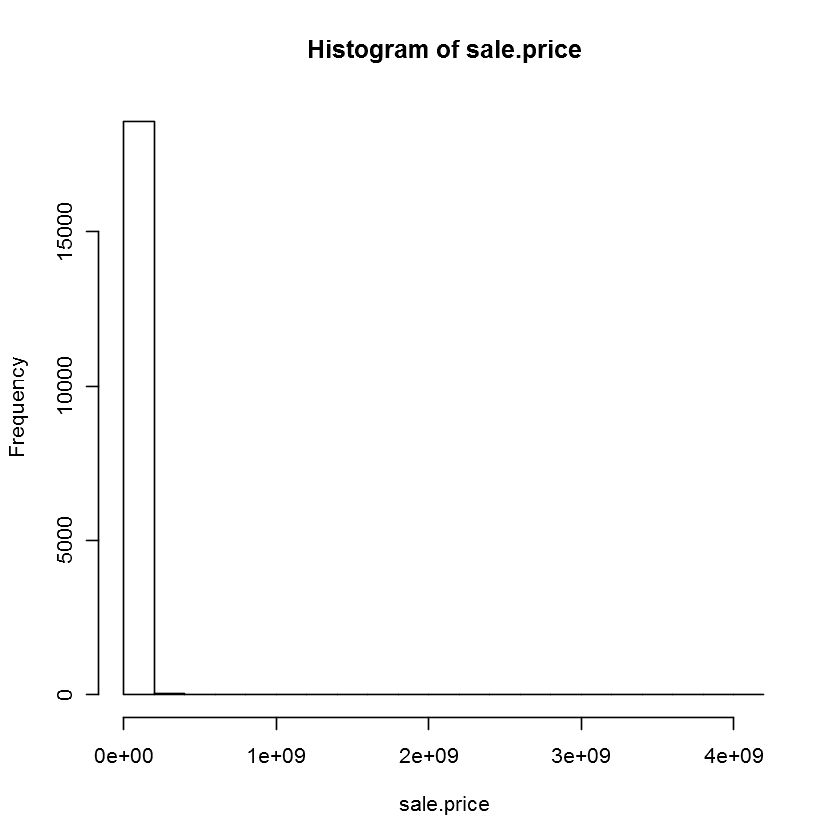

In [87]:
## do a bit of exploration to make sure there's not anything
## weird going on with sale prices
attach(RollingSalesManhattan)
hist(sale.price) 
detach(RollingSalesManhattan)
RollingSalesManhattan.sale <- RollingSalesManhattan[RollingSalesManhattan$sale.price!=0,]

### Step 6: Plotting the Data
#### A. Square Feet by Sales Price 
The graphic below shows a non-normal distribution and the scale of the data makes any meaningful analysis a challenge. Transforming the data may be a better approach.

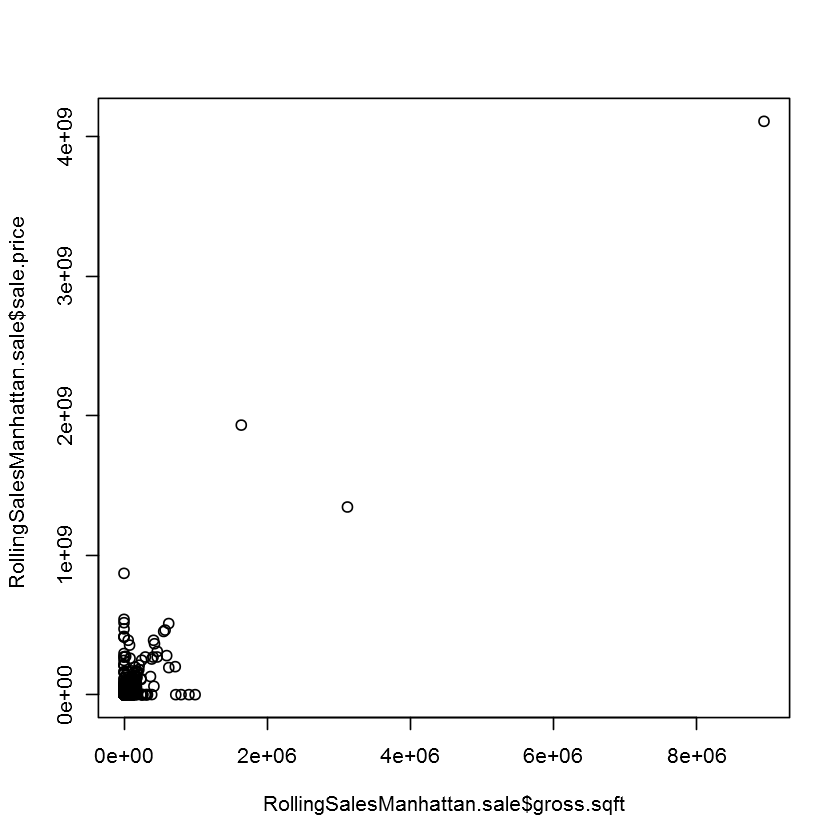

In [88]:
plot(RollingSalesManhattan.sale$gross.sqft,RollingSalesManhattan.sale$sale.price)

#### B. Log (base 10) Square Feet by Log (base 10) Sales Price

After log-transforming the data, we begin to see a more clear relationship between sales price and price per square foot, with some outliers. 

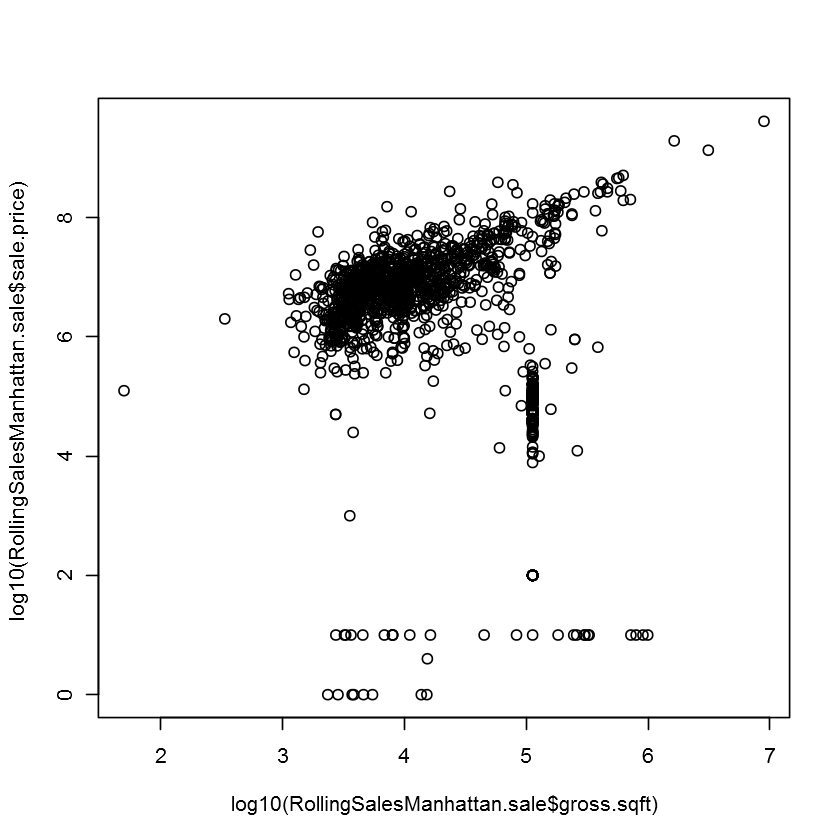

In [89]:
plot(log10(RollingSalesManhattan.sale$gross.sqft),log10(RollingSalesManhattan.sale$sale.price))

### Step 7: Evaluating One, Two and Three-family Homes

[1] 242  24

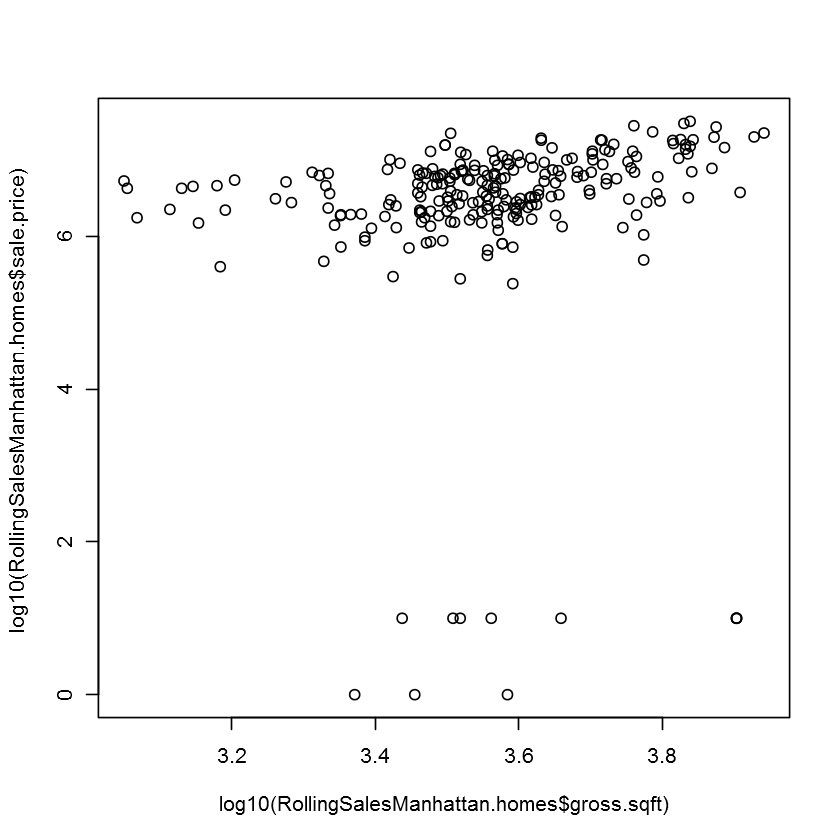

In [90]:
RollingSalesManhattan.homes <- RollingSalesManhattan.sale[which(grepl("FAMILY",RollingSalesManhattan.sale$building.class.category)),]
dim(RollingSalesManhattan.homes)
plot(log10(RollingSalesManhattan.homes$gross.sqft),log10(RollingSalesManhattan.homes$sale.price))

### Summarizing the Data

In [91]:
summary(RollingSalesManhattan.homes[which(RollingSalesManhattan.homes$sale.price<100000),])

    borough  neighborhood      
 Min.   :1   Length:11         
 1st Qu.:1   Class :character  
 Median :1   Mode  :character  
 Mean   :1                     
 3rd Qu.:1                     
 Max.   :1                     
                               
                                 building.class.category tax.class.at.present
 03  THREE FAMILY DWELLINGS                  :6          1      :11          
 02  TWO FAMILY DWELLINGS                    :3          1A     : 0          
 01  ONE FAMILY DWELLINGS                    :2          1C     : 0          
 04  TAX CLASS 1 CONDOS                      :0          2      : 0          
 07  RENTALS - WALKUP APARTMENTS             :0          2A     : 0          
 08  RENTALS - ELEVATOR APARTMENTS           :0          2B     : 0          
 (Other)                                     :0          (Other): 0          
     block           lot         ease.ment      building.class.at.present
 Min.   : 593   Min.   : 13.00   Mode:logical 

## Step 8: Removing Outliers

In [92]:
RollingSalesManhattan.homes$outliers <- (log10(RollingSalesManhattan.homes$sale.price) <=5) + 0
RollingSalesManhattan.homes <- RollingSalesManhattan.homes[which(RollingSalesManhattan.homes$outliers==0),]

## Step 9: Exploratory Data Analysis

#### A. Square Feet by Sales Price 
With the outliers removed, the data has a much more defined and easy to understand shape. Log-transforming may help additionally.

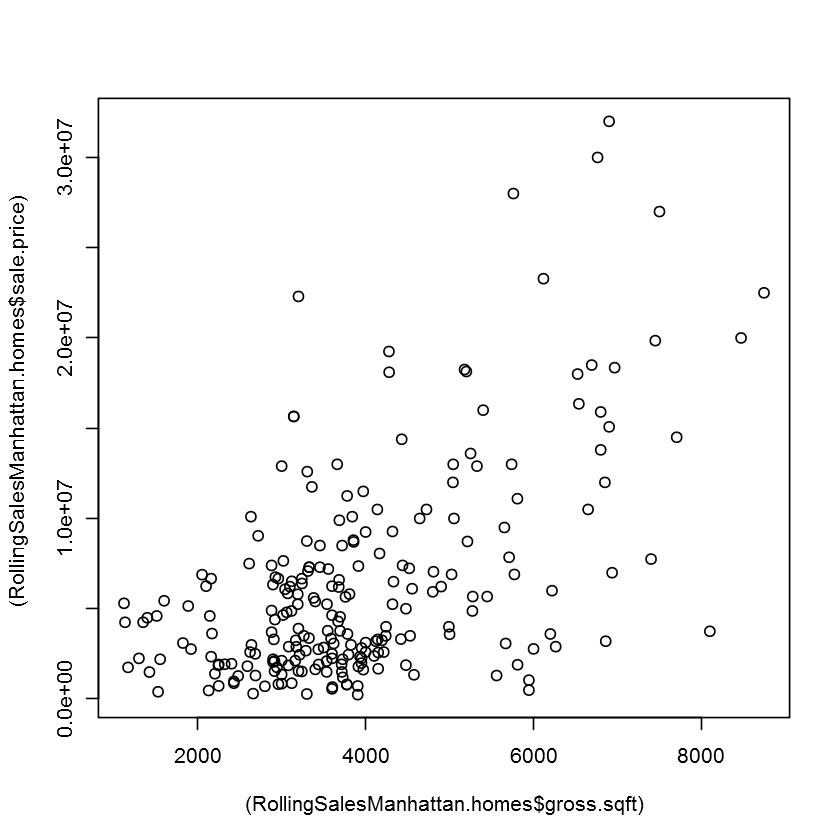

In [93]:
plot((RollingSalesManhattan.homes$gross.sqft),(RollingSalesManhattan.homes$sale.price))

#### B. Log (base 10) Square Feet by Log (base 10) Sales Price
The graphic below shows an even clearer relationship between the gross square foot and the sales price.

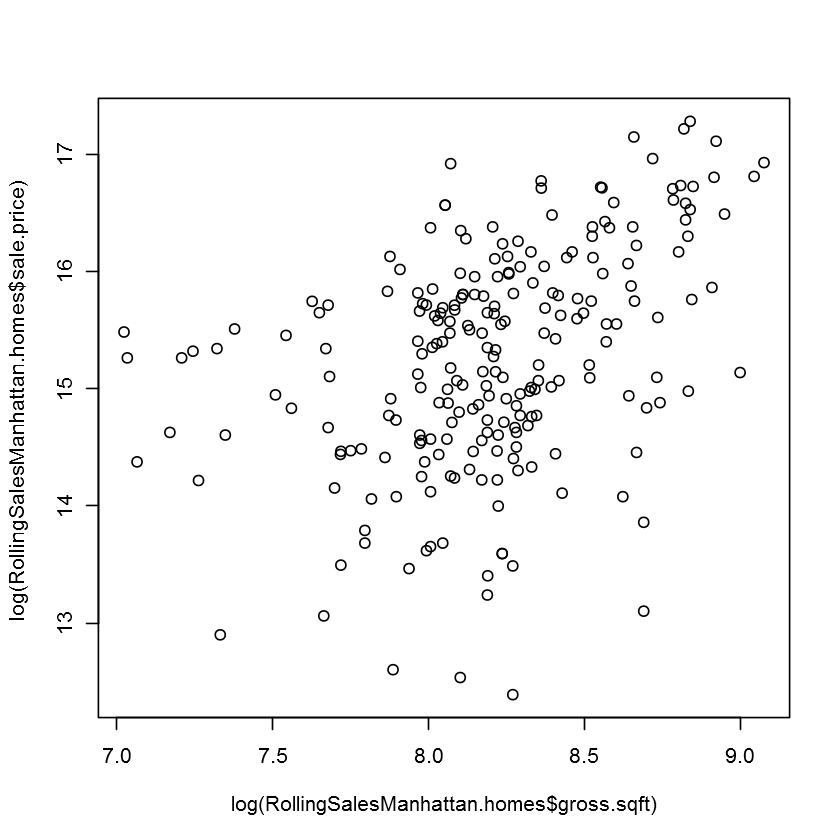

In [94]:
plot(log(RollingSalesManhattan.homes$gross.sqft),log(RollingSalesManhattan.homes$sale.price))

### Summarizing the Data

In [95]:
summary(RollingSalesManhattan.homes$sale.price)
summary(RollingSalesManhattan.homes$gross.sqft)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  240000  2250000  4600000  6321000  7800000 32000000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    3008    3672    3924    4542    8745 

### Step 9: Exploratory Data Analysis Across the Neighborhood

In [96]:
library(doBy)
fun <- function(x){c(count = length(x), sum = sum(x), var = var(x), mean = mean(x), max = max(x), min=min(x))}
SummaryN<-summaryBy(sale.price~neighborhood,data = RollingSalesManhattan.homes,FUN=fun)

In [97]:
with(RollingSalesManhattan.homes, plot(main="Sales count for each neighborhood",ylab="Count", neighborhood, horizontal = FALSE, scales=list(y=list(tick.number=6, relation="same", at=c(0, 200,400,600,800, 1000,1200,1400,1600,1800,2000)),x=list(rot=90)),
                      panel = function(x,y) {
                        panel.plot(x,y)
                        max.values <- max(y)
                        median.values <- median(y)
                        min.values <- min(y)
                        panel.abline(h=median.values, col.line="red")
                        panel.abline(h=max.values, col.line="blue")
                        panel.abline(h=min.values, col.line="red") }))


ERROR: Error in plot.default(main = "Sales count for each neighborhood", ylab = "Count", : argument 6 matches multiple formal arguments
